<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Datascience-assignments-11-to-15/blob/main/Neuralnetworks(Forestfires).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
path = r"/content/forestfires.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
categorical_cols = ['month', 'day', 'size_category']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [5]:
X = data.drop(['area'], axis=1).values
y = data['area'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']
scaler = StandardScaler()
X_train[:, 2:9] = scaler.fit_transform(X_train[:, 2:9])
X_test[:, 2:9] = scaler.transform(X_test[:, 2:9])

In [8]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 0s 9ms/step - loss: 1926.4304 - val_loss: 11526.5166
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 1918.0972 - val_loss: 11501.2236
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 1905.8315 - val_loss: 11488.0479
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 1895.0924 - val_loss: 11455.4287
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 1885.3492 - val_loss: 11417.1914
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 1873.9912 - val_loss: 11414.2568
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 1864.9944 - val_loss: 11363.8730
Epoch 8/50
13/13 [==============================] - 0s 5ms/step - loss: 1854.4110 - val_loss: 11370.9707
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 1846.7643 - val_loss: 11315.6982
Epoch 10/50
13/13 [==============================] - 0s

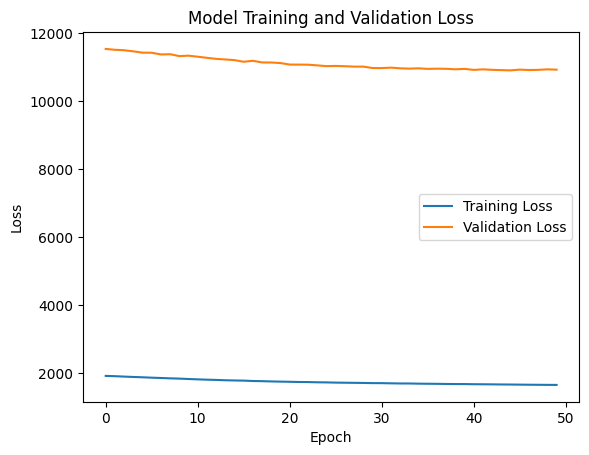

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()